Question 1

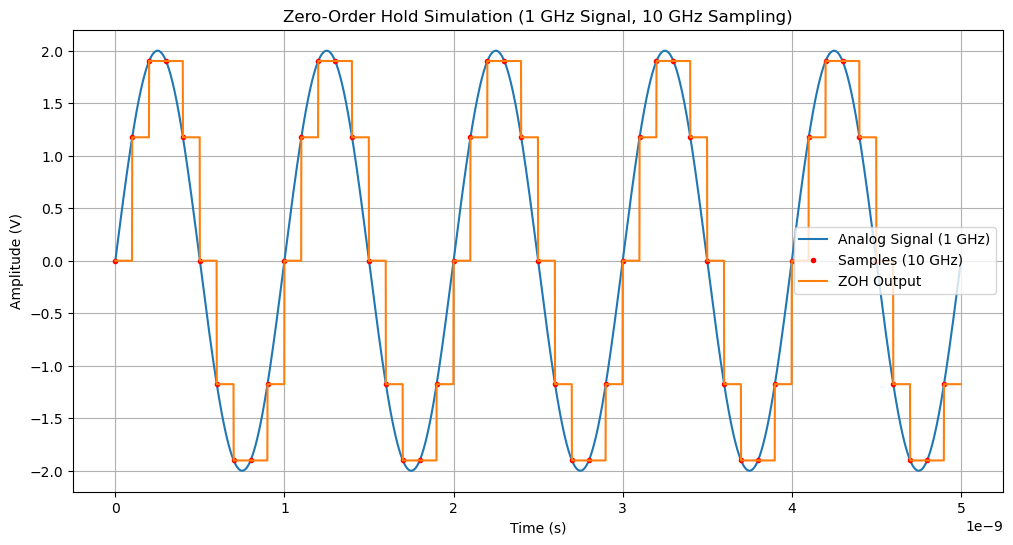

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def zero_order_hold(analog_signal, sampling_rate, time):
    sampling_period = 1.0 / sampling_rate
    sampled_time = np.arange(0, time[-1], sampling_period)
    sampled_signal = np.interp(sampled_time, time, analog_signal)
    zoh_signal = np.repeat(sampled_signal, int(len(time) / len(sampled_time)))[:len(time)]
    return sampled_time, sampled_signal, zoh_signal

# Parameters
signal_freq = 1e9  # 1 GHz
sampling_freq = 10e9  # 10 GHz
amplitude = 2.0  # 2V
time_constant = 10e-12  # 10 ps

# Time vector
total_time = 5 * (1 / signal_freq) # cover 5 periods of the 1GHz wave.
time_resolution = time_constant/10 # make the time resolution small enough to capture the time constant
time = np.arange(0, total_time, time_resolution)

# Generate sinusoidal signal
analog_sig = amplitude * np.sin(2 * np.pi * signal_freq * time)

# Perform ZOH sampling
sampled_time, sampled_sig, zoh_sig = zero_order_hold(analog_sig, sampling_freq, time)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, analog_sig, label='Analog Signal (1 GHz)')
plt.plot(sampled_time, sampled_sig, 'ro', markersize=3, label='Samples (10 GHz)')
plt.plot(time, zoh_sig, label='ZOH Output')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Zero-Order Hold Simulation (1 GHz Signal, 10 GHz Sampling)')
plt.grid(True)
plt.show()

Question 2.a

In [31]:
import sympy as sy
import numpy as np

NRZ = 0.5
bit_period = 1 / 10e9
t = bit_period / 2
FSR = 1
N = 7
LSB = FSR / 2**N
tau = sy.Symbol("tau")

#LSB > Vin * e^(-t/tau)
equation = NRZ * sy.exp(-t / tau) - LSB

# Approximate initial guess
# LSB = Vin * exp(-t/tau)
# LSB/Vin = exp(-t/tau)
# ln(LSB/Vin) = -t/tau
# tau = -t/ln(LSB/Vin)
solution = -t / np.log(LSB / NRZ)
print(f"Minimum tau value = {solution*1e12} (ps)")

Minimum tau value = 12.022458674074697 (ps)


Question 2.b

The time constant would depend on the amplitude of the signal. However, if the amplitude is the same as the previous question, the time constant would be the same since the required LSB, sampling period, NOB, and FSR (max voltage swing) all stayed the same.